# Introduction

In this lab, we will learn about the HDBSCAN clustering algorithm, which is an improvement over the DBSCAN algorithm. We will compare both algorithms on specific datasets and evaluate HDBSCAN's sensitivity to certain hyperparameters.

# Import Required Libraries and Generate Sample Data

We will first import the necessary libraries and generate sample data. We will create a dataset from a mixture of three bi-dimensional and isotropic Gaussian distributions.

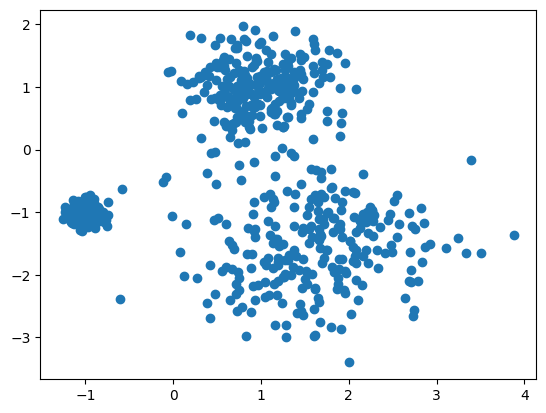

In [1]:
import numpy as np
from sklearn.cluster import HDBSCAN, DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

centers = [[1, 1], [-1, -1], [1.5, -1.5]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=[0.4, 0.1, 0.75], random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [3]:
def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 4))
    labels = labels if labels is not None else np.ones(X.shape[0])
    probabilities = probabilities if probabilities is not None else np.ones(X.shape[0])
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    # The probability of a point belonging to its labeled cluster determines
    # the size of its marker
    proba_map = {idx: probabilities[idx] for idx in range(len(labels))}
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_index = (labels == k).nonzero()[0]
        for ci in class_index:
            ax.plot(
                X[ci, 0],
                X[ci, 1],
                "x" if k == -1 else "o",
                markerfacecolor=tuple(col),
                markeredgecolor="k",
                markersize=4 if k == -1 else 1 + 5 * proba_map[ci],
            )
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    preamble = "True" if ground_truth else "Estimated"
    title = f"{preamble} number of clusters: {n_clusters_}"
    if parameters is not None:
        parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
        title += f" | {parameters_str}"
    ax.set_title(title)
    plt.tight_layout()

# Scale Invariance

We will demonstrate that HDBSCAN is scale-invariant, unlike DBSCAN. DBSCAN requires the eps parameter to be tuned for the specific dataset at use. We will compare the clustering obtained with the same value but applied to rescaled versions of the dataset.

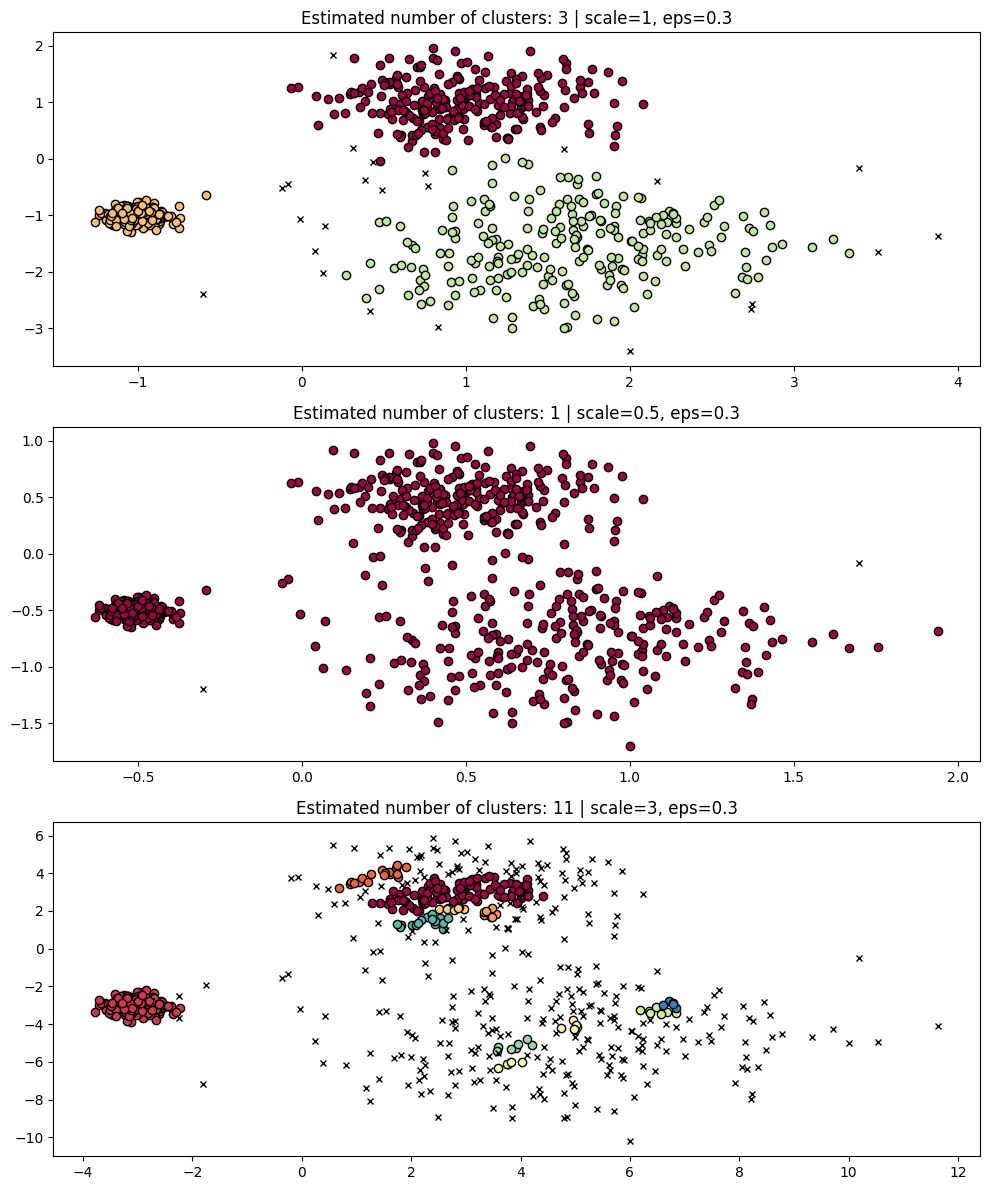

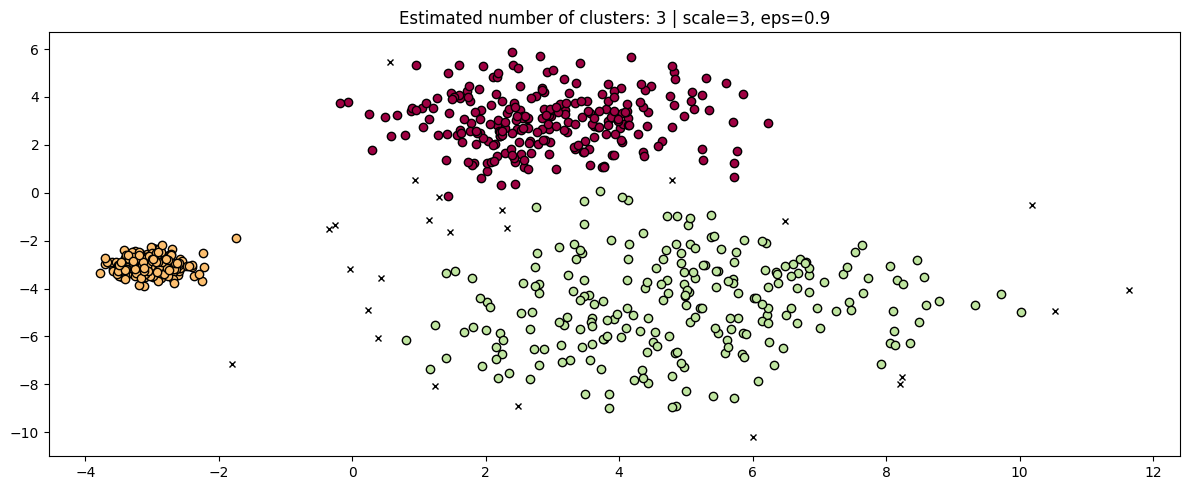

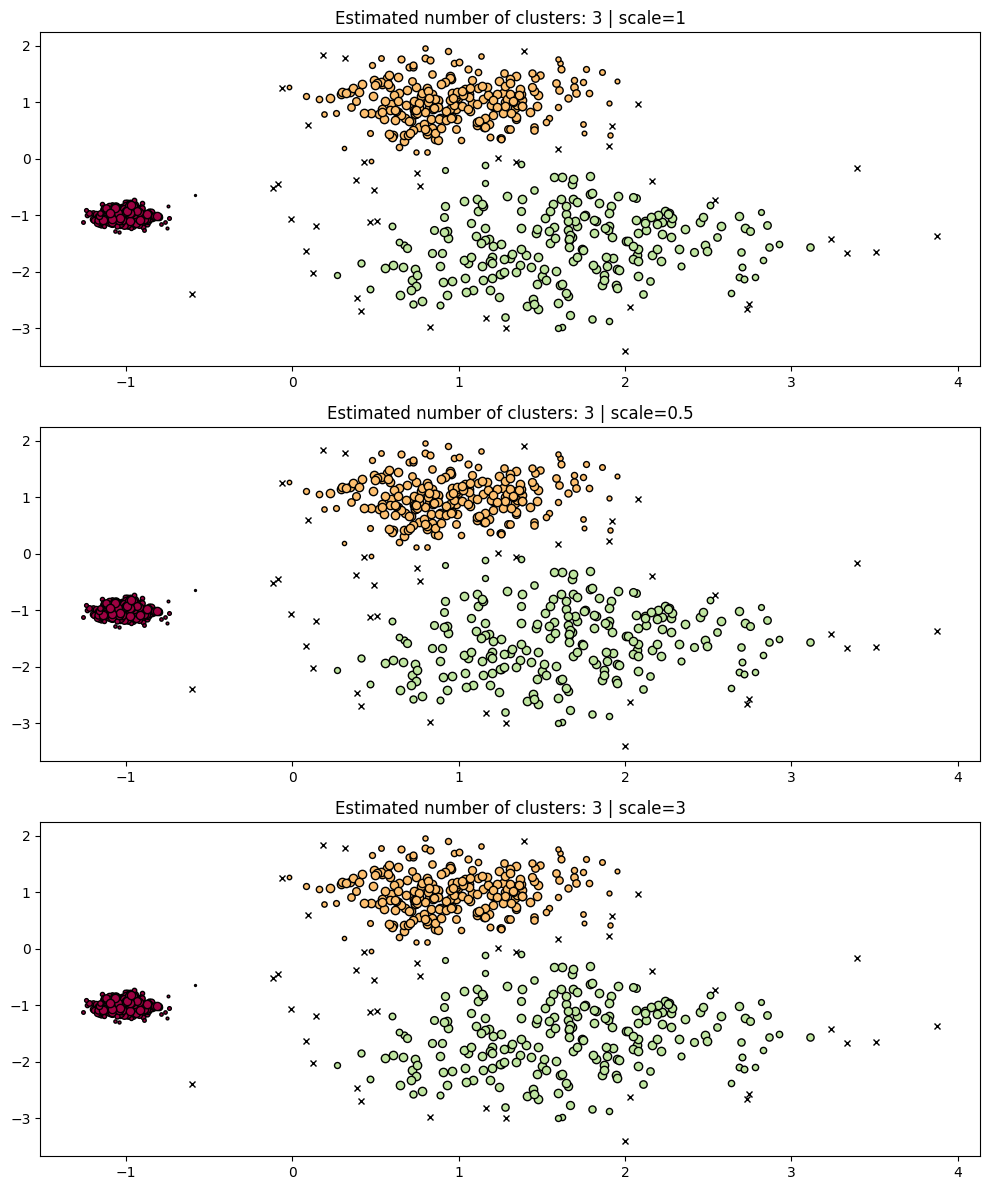

In [4]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
dbs = DBSCAN(eps=0.3)
for idx, scale in enumerate((1, 0.5, 3)):
    dbs.fit(X * scale)
    plot(X * scale, dbs.labels_, parameters={"scale": scale, "eps": 0.3}, ax=axes[idx])

fig, axis = plt.subplots(1, 1, figsize=(12, 5))
dbs = DBSCAN(eps=0.9).fit(3 * X)
plot(3 * X, dbs.labels_, parameters={"scale": 3, "eps": 0.9}, ax=axis)

fig, axes = plt.subplots(3, 1, figsize=(10, 12))
hdb = HDBSCAN()
for idx, scale in enumerate((1, 0.5, 3)):
    hdb.fit(X)
    plot(X, hdb.labels_, hdb.probabilities_, ax=axes[idx], parameters={"scale": scale})

# Multi-Scale Clustering

We will demonstrate that HDBSCAN is capable of multi-scale clustering, which accounts for clusters with varying density. Traditional DBSCAN assumes that any potential clusters are homogenous in density.

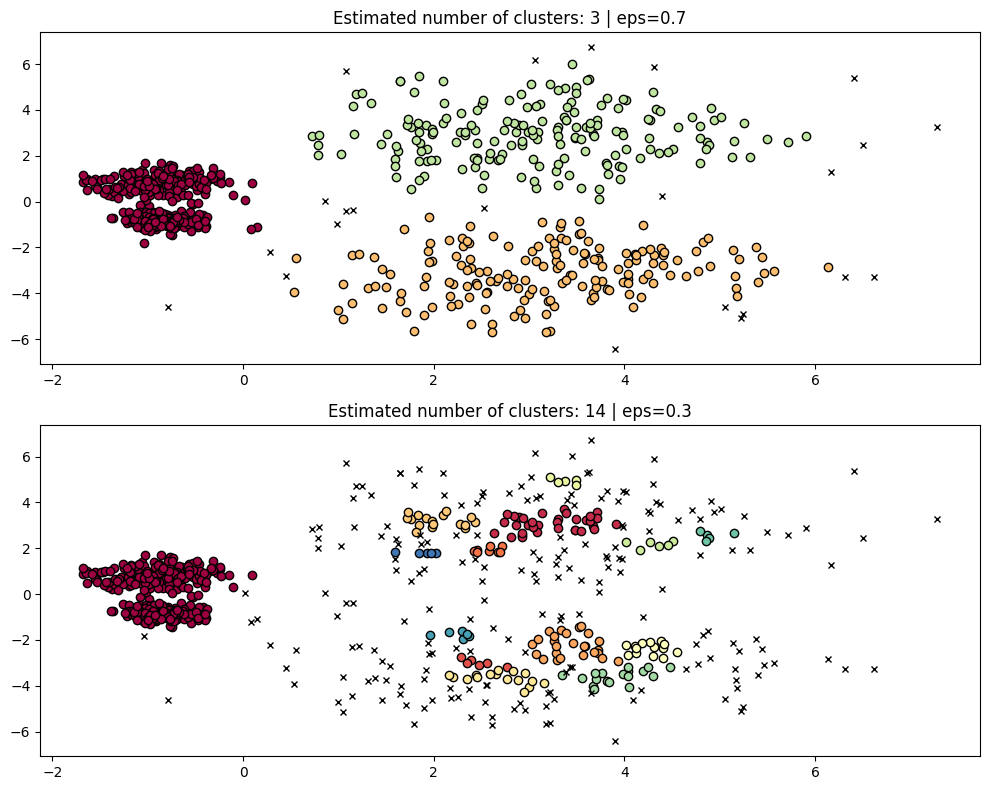

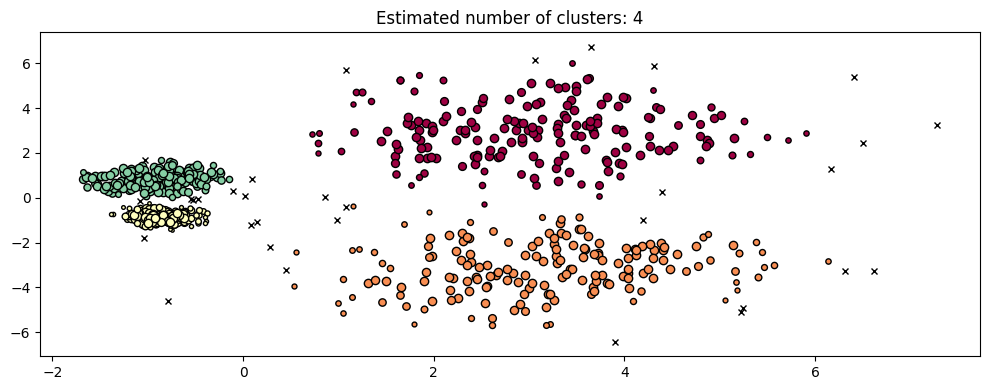

In [5]:
centers = [[-0.85, -0.85], [-0.85, 0.85], [3, 3], [3, -3]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=[0.2, 0.35, 1.35, 1.35], random_state=0)

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
params = {"eps": 0.7}
dbs = DBSCAN(**params).fit(X)
plot(X, dbs.labels_, parameters=params, ax=axes[0])
params = {"eps": 0.3}
dbs = DBSCAN(**params).fit(X)
plot(X, dbs.labels_, parameters=params, ax=axes[1])

hdb = HDBSCAN().fit(X)
plot(X, hdb.labels_, hdb.probabilities_)

# Hyperparameter Robustness

We will demonstrate that HDBSCAN is relatively robust to various real-world examples thanks to the **min_cluster_size** and **min_samples** parameters whose clear meaning helps to tune them.

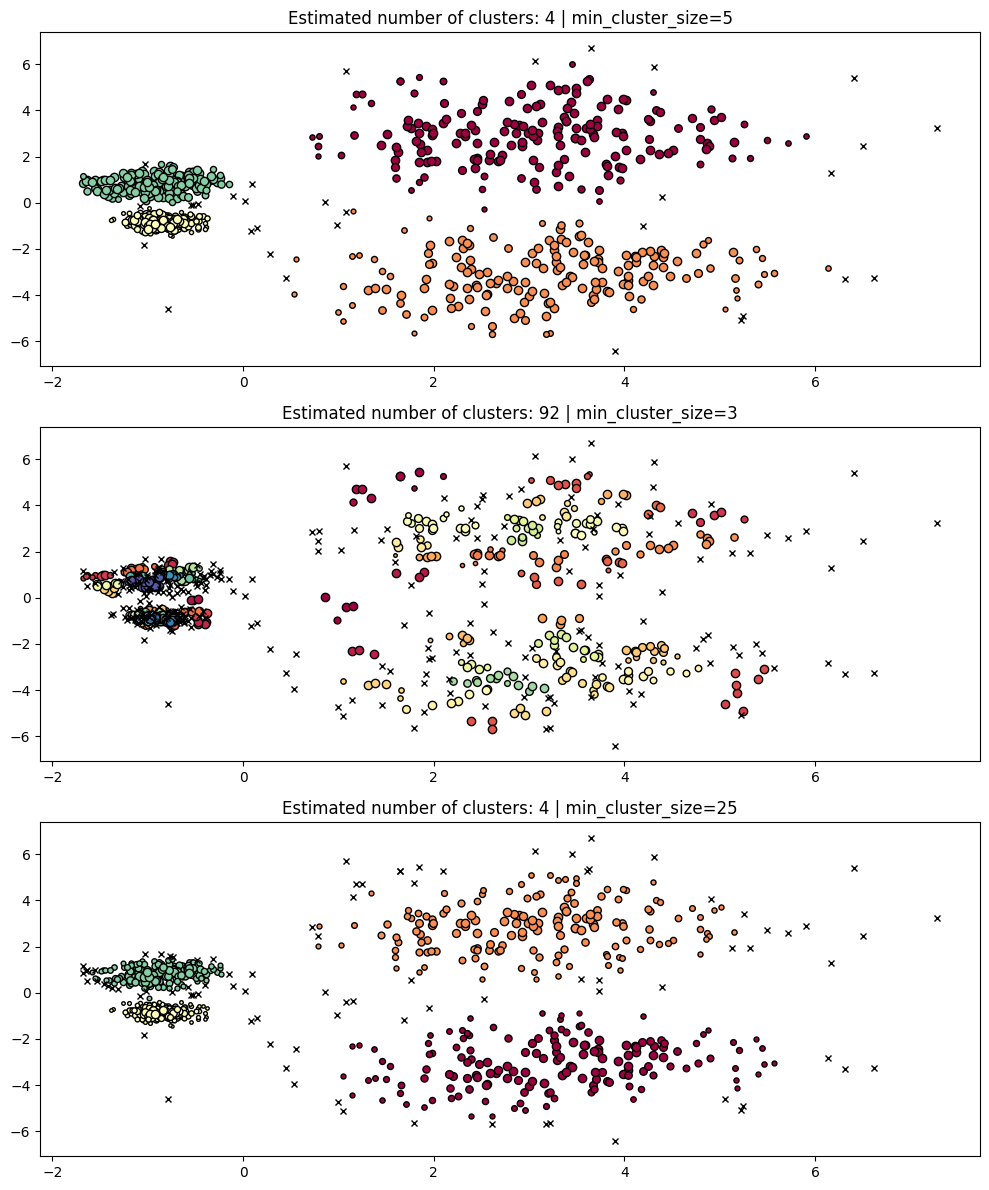

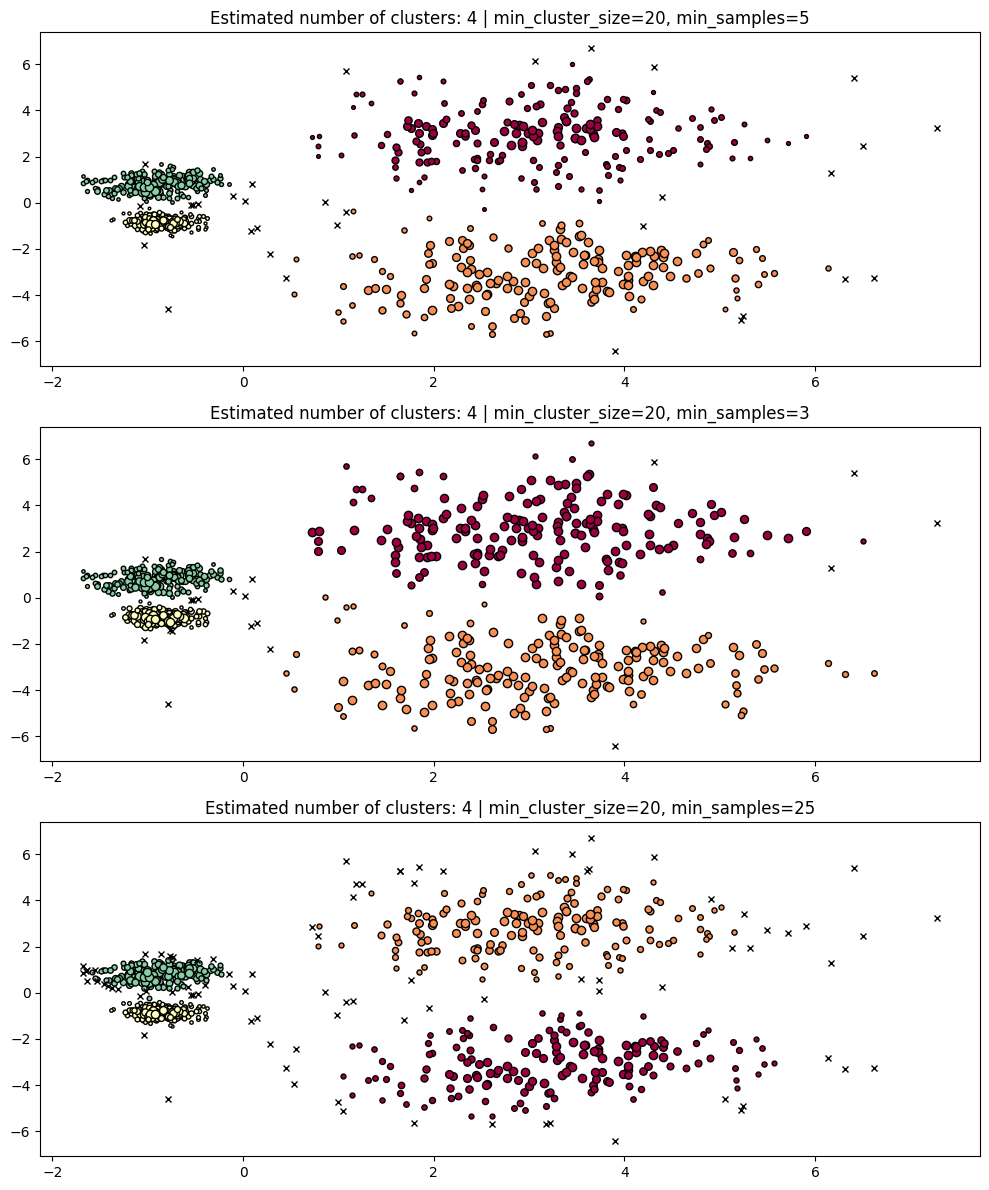

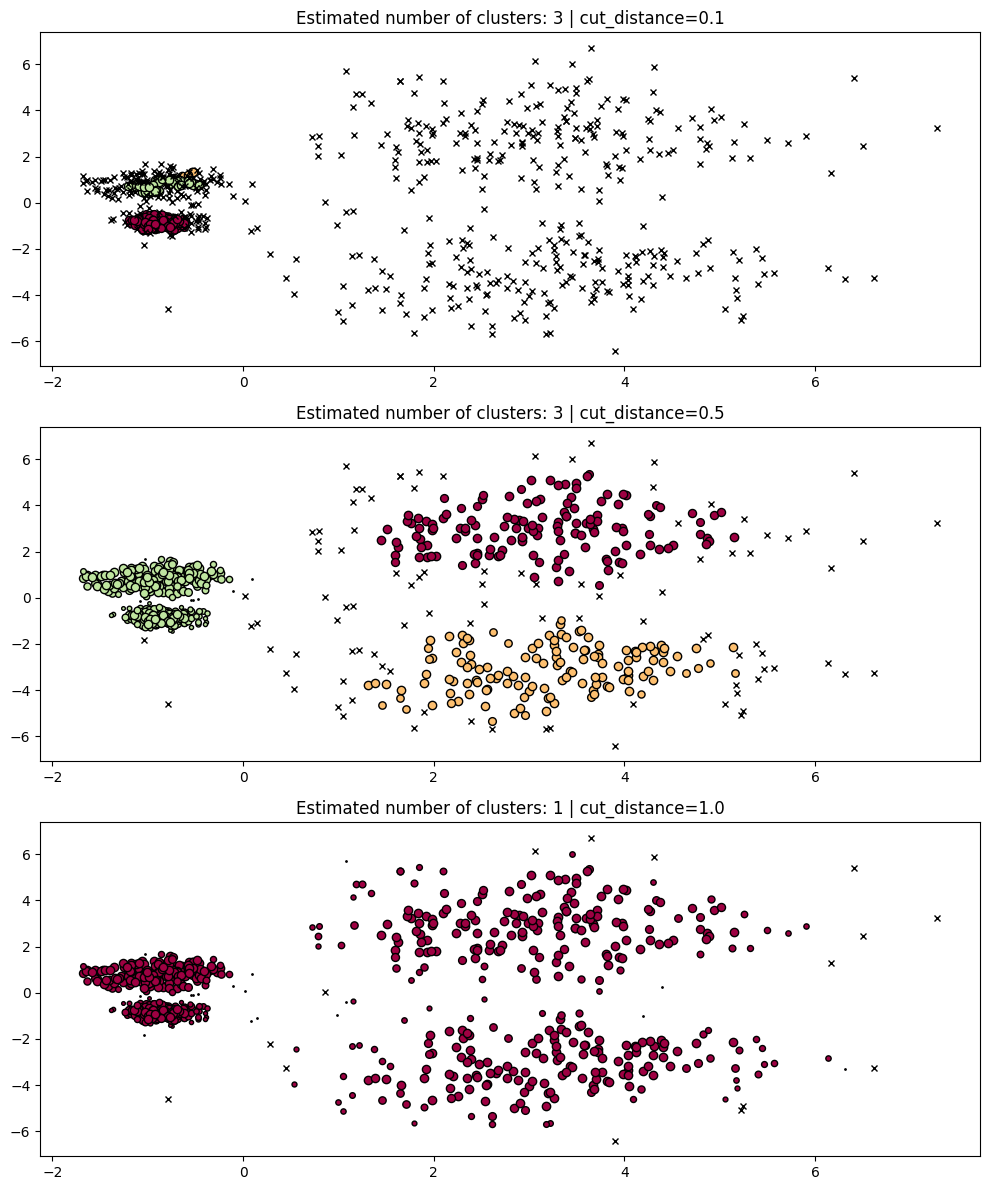

In [6]:
PARAM = ({"min_cluster_size": 5}, {"min_cluster_size": 3}, {"min_cluster_size": 25})
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    hdb = HDBSCAN(**param).fit(X)
    labels = hdb.labels_

    plot(X, labels, hdb.probabilities_, param, ax=axes[i])

PARAM = (
    {"min_cluster_size": 20, "min_samples": 5},
    {"min_cluster_size": 20, "min_samples": 3},
    {"min_cluster_size": 20, "min_samples": 25},
)
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    hdb = HDBSCAN(**param).fit(X)
    labels = hdb.labels_

    plot(X, labels, hdb.probabilities_, param, ax=axes[i])

PARAM = (
    {"cut_distance": 0.1},
    {"cut_distance": 0.5},
    {"cut_distance": 1.0},
)
hdb = HDBSCAN()
hdb.fit(X)
fig, axes = plt.subplots(len(PARAM), 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    labels = hdb.dbscan_clustering(**param)

    plot(X, labels, hdb.probabilities_, param, ax=axes[i])

# Summary

In this lab, we learned about the HDBSCAN clustering algorithm and its advantages over the DBSCAN algorithm. We saw that HDBSCAN is scale-invariant, capable of multi-scale clustering, and relatively robust to various real-world examples thanks to the **min_cluster_size** and **min_samples** parameters.